<a href="https://colab.research.google.com/github/abiflynn/python_pandas/blob/main/challenge_12_python_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge 12: Data Visualization


In [2]:
import pandas as pd

url = 'https://drive.google.com/file/d/15s7M2QllSR1GyNWM8RgcgabK-4hlMgpk/view?usp=sharing' # people.csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
people = pd.read_csv(path)


## Pandas plotting

### Plotting 1 Variable

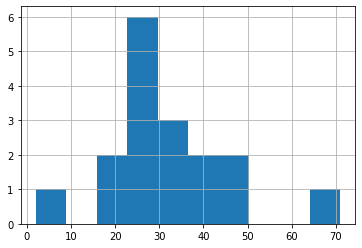

In [ ]:
# histogram of the age column
people.age.hist();

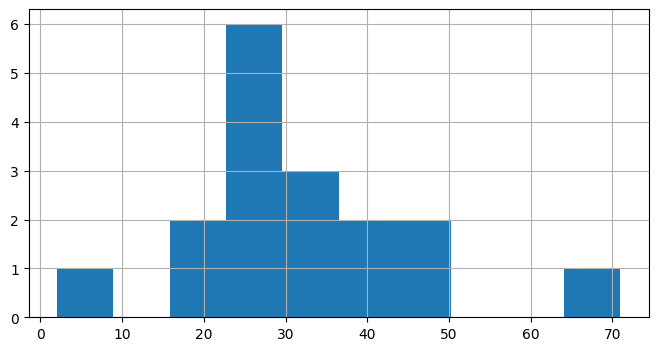

In [3]:
people.age.hist(bins=10, figsize=(8,4));

In [4]:
# 1. group the categories and generate the frequencies with value_counts()
color_freq = people.favourite_color.value_counts()
color_freq

Blue      6
Red       5
Yellow    4
Gray      1
Orange    1
Name: favourite_color, dtype: int64

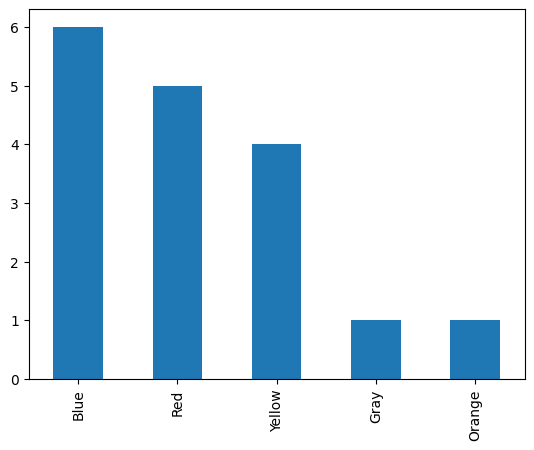

In [5]:
# 2. plot our value_counts from above as a bar plot
color_freq.plot.bar();

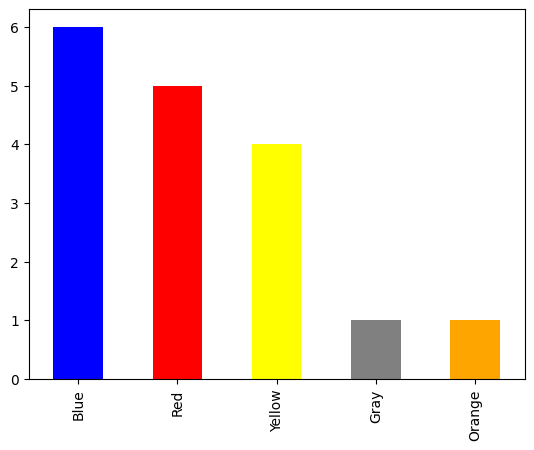

In [6]:
# changing the colors of the bars
color_freq.plot.bar(color=["blue", "red", "yellow", "gray", "orange"]);

###### **Exercise 1:**
Make a bar plot for the countries where people are from. Highlight India (IN) in a brighter color.



<Axes: >

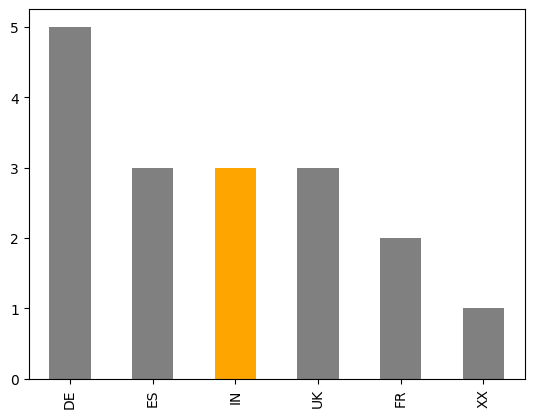

In [7]:
# your code here
countries_from = people.country.value_counts()
countries_from.plot.bar(color=["gray", "gray", "orange", "gray", "gray"])

### Plotting 2 or more variables


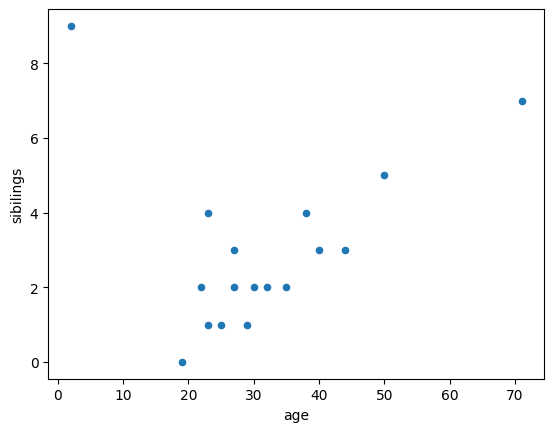

In [8]:
people.plot.scatter(x="age", y="sibilings");

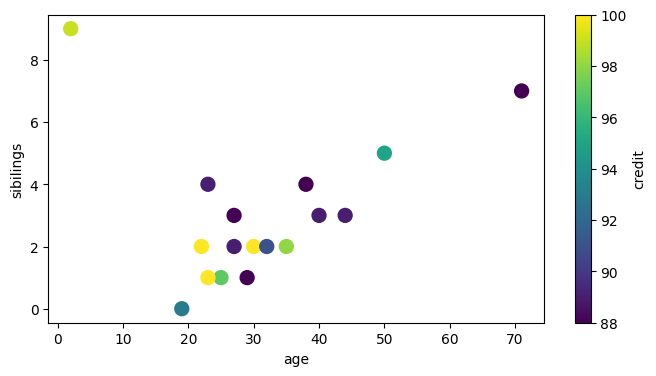

In [10]:
people.plot.scatter(x="age", 
                    y="sibilings", 
                    c="credit",
                    s=100,
                    cmap="viridis",
                    figsize=(8,4),
                    sharex=False
                   );

### Challenges:
Use the `vehicles.csv` dataset to create the plots in the following exercises.

In [11]:
url = 'https://drive.google.com/file/d/18zYGrzRhn_mz1HJLXxSO_MwR0_nWBS3K/view?usp=sharing' # vehicles.csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
cars = pd.read_csv(path)

#Add a column that states if a car's transmission is automatic or manual:
cars["Auto"] = cars["Transmission"].str.contains("Automatic")

cars.head(2)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,Auto
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950,True
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,True


###### **Exercise 2:**
How many cars have Automatic or Manual transmission?



<Axes: >

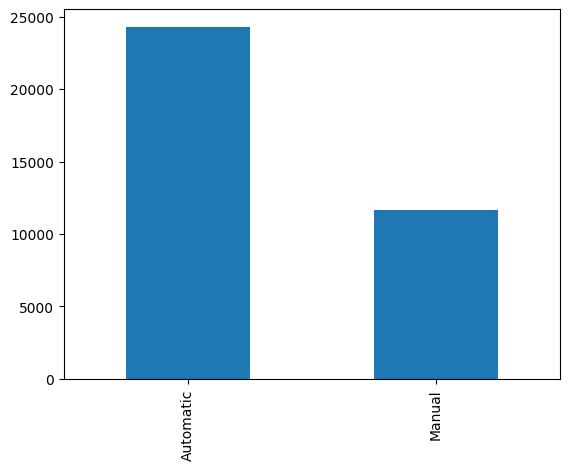

In [12]:
cars["Auto"] = cars.Transmission.str.contains("Auto")
cars.Auto.replace([True, False], ['Automatic', 'Manual']).value_counts().plot.bar()

###### **Exercise 3:**
How many cars have each type of Drivetrain? Highlight "All-Wheel Drive" in a different color to everything else

<Axes: >

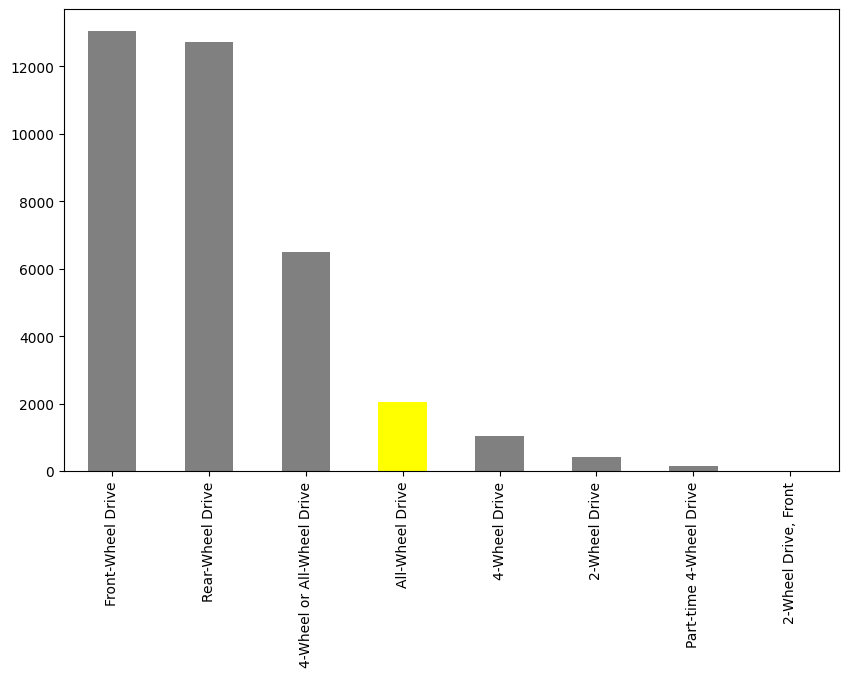

In [14]:
cars_drive = cars.Drivetrain.value_counts()
cars_drive.plot.bar(color=["gray", "gray", "gray", "yellow", "gray", "gray", "gray", "gray"], figsize=(10,6))

###### **Exercise 4:**
represent the relationship between fuel consumption (`Combined MPG`) and the number of `Cylinders` a car has, using a scatterplot:


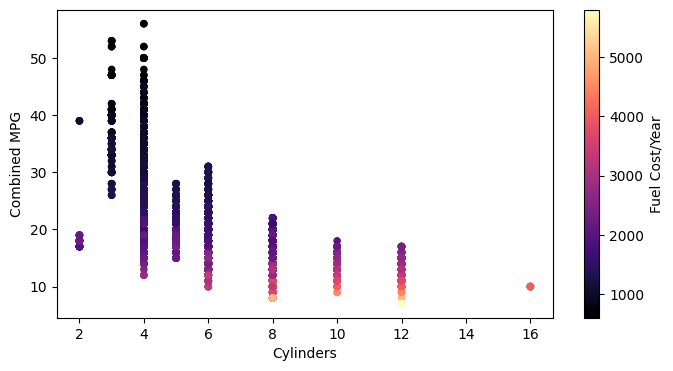

In [15]:
cars.plot.scatter(x="Cylinders", y="Combined MPG", s=20, c="Fuel Cost/Year", cmap="magma", figsize=(8,4), sharex=False);

###### **Exercise 5:**
explore the same relationship as in exercise 4, but this time use a [boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html):

<Axes: title={'center': 'Combined MPG'}, xlabel='Cylinders'>

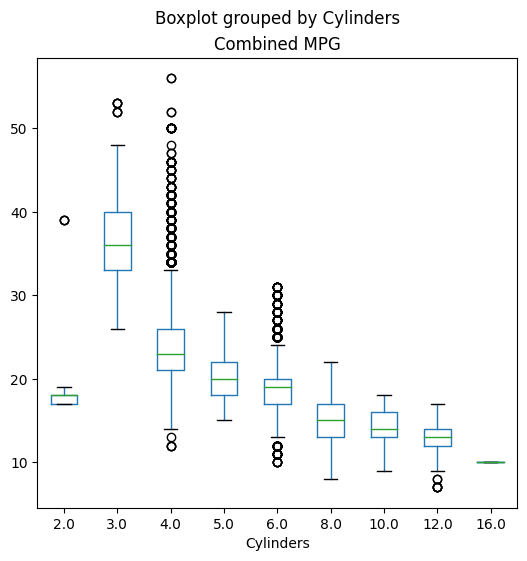

In [17]:
cars.boxplot(column="Combined MPG",
             by="Cylinders",
             figsize=(6,6),
             grid=False)

###### **Exercise 6:**
Create a plot that displays the evolution of the average CO2 emissions by cars over the years.



<Axes: xlabel='Year'>

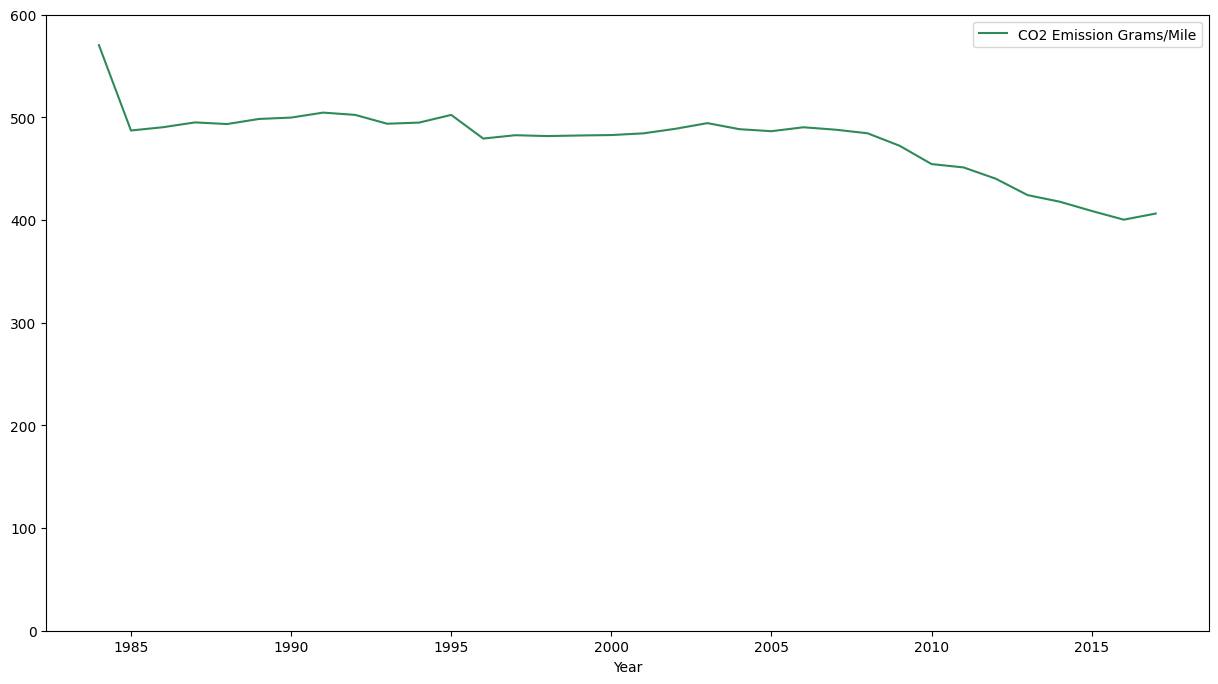

In [18]:
cars_avg_co2 = cars.groupby("Year").agg({"CO2 Emission Grams/Mile": "mean"}).sort_values(by="Year", ascending=False)
cars_avg_co2.plot.line(color="seagreen",figsize=(15,8), ylim=(0,600))